## 1. Importation des librairies et du fichier CSV

In [858]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

df = pd.read_csv(r"C:\Users\G096103\OneDrive - General Mills\Desktop\Dossier Perso\Python\data_analysis_project\dirty_cafe_sales.csv")

## 2. Préparation de la data 

In [859]:
df_copy = df.copy()

In [860]:
df_copy.head()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
0,TXN_1961373,Coffee,2,2.0,4.0,Credit Card,Takeaway,2023-09-08
1,TXN_4977031,Cake,4,3.0,12.0,Cash,In-store,2023-05-16
2,TXN_4271903,Cookie,4,1.0,ERROR,Credit Card,In-store,2023-07-19
3,TXN_7034554,Salad,2,5.0,10.0,UNKNOWN,UNKNOWN,2023-04-27
4,TXN_3160411,Coffee,2,2.0,4.0,Digital Wallet,In-store,2023-06-11


In [861]:
df_copy.tail()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
9995,TXN_7672686,Coffee,2,2.0,4.0,NaN,UNKNOWN,2023-08-30
9996,TXN_9659401,NaN,3,NaN,3.0,Digital Wallet,NaN,2023-06-02
9997,TXN_5255387,Coffee,4,2.0,8.0,Digital Wallet,NaN,2023-03-02
9998,TXN_7695629,Cookie,3,NaN,3.0,Digital Wallet,NaN,2023-12-02
9999,TXN_6170729,Sandwich,3,4.0,12.0,Cash,In-store,2023-11-07


In [862]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    10000 non-null  object
 1   Item              9667 non-null   object
 2   Quantity          9862 non-null   object
 3   Price Per Unit    9821 non-null   object
 4   Total Spent       9827 non-null   object
 5   Payment Method    7421 non-null   object
 6   Location          6735 non-null   object
 7   Transaction Date  9841 non-null   object
dtypes: object(8)
memory usage: 625.1+ KB


In [863]:
df_copy.describe()

,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
count,10000,9667,9862,9821,9827,7421,6735,9841
unique,10000,10,7,8,19,5,4,367
top,TXN_1961373,Juice,5,3.0,6.0,Digital Wallet,Takeaway,UNKNOWN
freq,1,1171,2013,2429,979,2291,3022,159


In [864]:
df_copy.shape

(10000, 8)

In [865]:
df_copy["Quantity"] = pd.to_numeric(df_copy["Quantity"], errors= "coerce")

In [866]:
df_copy[df_copy["Quantity"].isna()].head()


,Transaction ID,Item,Quantity,Price Per Unit,Total Spent,Payment Method,Location,Transaction Date
20,TXN_3522028,Smoothie,NaN,4.0,20.0,Cash,In-store,2023-04-04
55,TXN_5522862,Cookie,NaN,1.0,2.0,Credit Card,Takeaway,2023-03-19
57,TXN_2080895,Cake,NaN,3.0,3.0,Digital Wallet,In-store,2023-04-19
66,TXN_8501819,Juice,NaN,3.0,6.0,Cash,NaN,2023-03-30
117,TXN_2148617,Juice,NaN,3.0,9.0,Digital Wallet,UNKNOWN,2023-01-10


In [867]:
df_copy["Quantity"].isna().sum()

np.int64(479)

In [868]:
df_copy = df_copy.dropna(subset = ["Quantity"])
df_copy = df_copy.dropna(subset=["Item"])

In [869]:
df_copy["Price Per Unit"] = pd.to_numeric(df_copy["Price Per Unit"], errors="coerce")
df_copy["Total Spent"] = pd.to_numeric(df_copy["Total Spent"], errors = "coerce")

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9206 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction ID    9206 non-null   object 
 1   Item              9206 non-null   object 
 2   Quantity          9206 non-null   float64
 3   Price Per Unit    8713 non-null   float64
 4   Total Spent       8735 non-null   float64
 5   Payment Method    6838 non-null   object 
 6   Location          6194 non-null   object 
 7   Transaction Date  9061 non-null   object 
dtypes: float64(3), object(5)
memory usage: 647.3+ KB


In [870]:
df_copy["Total Spent"] = df_copy["Total Spent"].fillna(df_copy["Quantity"] * df_copy["Price Per Unit"])
df_copy = df_copy.dropna(subset = ["Price Per Unit", "Total Spent"])

In [871]:
df_copy["Transaction Date"] = pd.to_datetime(df_copy["Transaction Date"], errors = "coerce")

In [872]:
df_copy["Payment Method"] = df_copy["Payment Method"].fillna("Unknown")
df_copy["Location"] = df_copy["Location"].fillna("Unknown")
df_copy["Item"] = df_copy["Item"].str.upper()

In [873]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8713 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction ID    8713 non-null   object        
 1   Item              8713 non-null   object        
 2   Quantity          8713 non-null   float64       
 3   Price Per Unit    8713 non-null   float64       
 4   Total Spent       8713 non-null   float64       
 5   Payment Method    8713 non-null   object        
 6   Location          8713 non-null   object        
 7   Transaction Date  8320 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 612.6+ KB


In [874]:
df_copy.describe().round(2)

,Quantity,Price Per Unit,Total Spent,Transaction Date
count,8713.00,8713.00,8713.00,8320
mean,3.02,2.95,8.93,2023-07-01 16:04:54.230769152
min,1.00,1.00,1.00,2023-01-01 00:00:00
25%,2.00,2.00,4.00,2023-04-01 00:00:00
50%,3.00,3.00,8.00,2023-07-02 00:00:00
75%,4.00,4.00,12.00,2023-10-01 00:00:00
max,5.00,5.00,25.00,2023-12-31 00:00:00
std,1.42,1.28,6.00,NaN


## 3. Analyse concrète avec visualisations

### Best Sellers

In [875]:
df_copy = df_copy[df_copy["Item"] != "UNKNOWN"]
df_copy = df_copy[df_copy["Item"] != "ERROR"]

In [876]:
top_categories = df_copy.groupby("Item")["Total Spent"].sum().sort_values(ascending=False)
print("--- Chiffre d'Affaires par Article ---")
print(top_categories.round(2))


--- Chiffre d'Affaires par Article ---
Item
SALAD       15600.0
SANDWICH    12296.0
SMOOTHIE    12132.0
JUICE        9561.0
CAKE         9540.0
COFFEE       6424.0
TEA          4431.0
COOKIE       2898.0
Name: Total Spent, dtype: float64


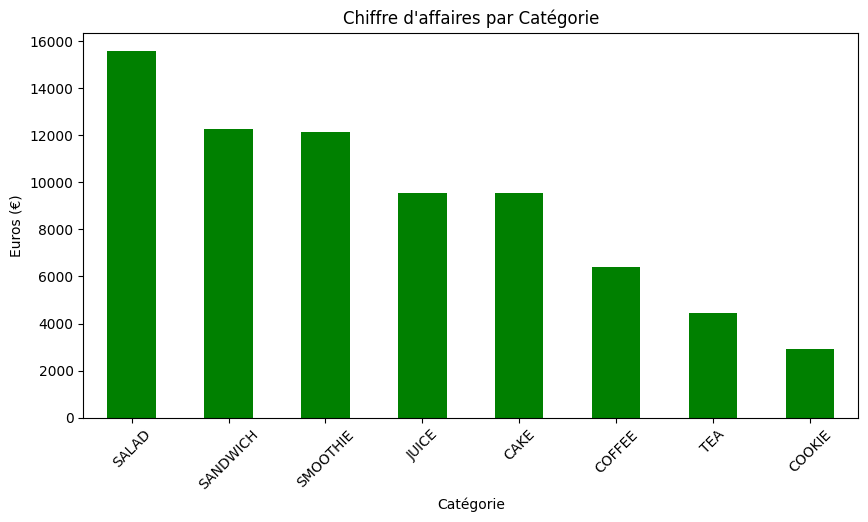

In [877]:
plt.figure()
top_categories.plot( kind="bar", color = "green", figsize =(10,5))
plt.title("Chiffre d'affaires par Catégorie")
plt.ylabel("Euros (€)")
plt.xlabel("Catégorie")
plt.xticks(rotation=45)
plt.show()

### On voit clairement que la Salade est le produit phare en termes de revenus, suivie par le Sandwich et le Smoothie.

##### Les produits frais et "santé" (Salades, Sandwichs, Smoothies) sont les véritables moteurs du chiffre d'affaires.

##### La Salade génère plus de 15 000 €.

## Saisonnalité 

In [878]:
df_copy["Mois"] = df_copy["Transaction Date"].dt.month
ventes_mensuelles = df_copy.groupby("Mois")["Total Spent"].sum()

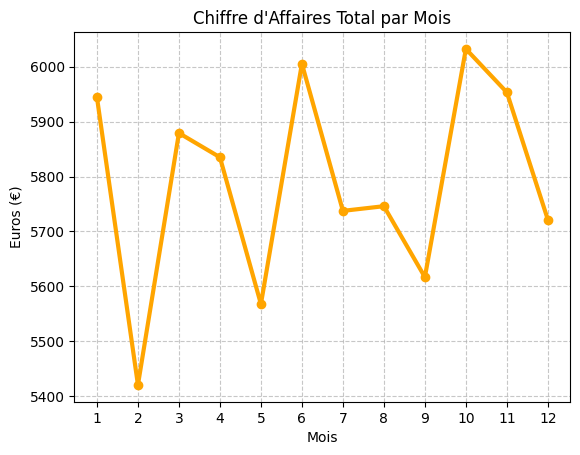

In [879]:
plt.figure()
ventes_mensuelles.plot(kind = "line", marker = "o", color = "orange", linewidth = 3)
plt.title("Chiffre d'Affaires Total par Mois")
plt.xlabel("Mois")
plt.ylabel("Euros (€)")
plt.grid(True, linestyle="--", alpha=0.7)
plt.xticks(range(1, 13)) 
plt.show()

### Le mois d'Octobre est le mois où le chiffre d'affaires était le plus conséquent (environ 6000 €). Contrairement à Février où il était le plus bas( environ 5400€ )